# 회귀

## 1. 경사하강법 파이썬으로 구현
- p.314

## 1-1. 단순선형회귀에서 경사하강법 적용

- step1 : w1,w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
- step2 : w1,w0 각 편미분 결과값을 이전 w에서 마이너스해서 새로운 w값 구한다.
- step3 : 비용함수가 감소하는 방향성으로 주어진 횟수만큼 step2반복하면서 w1,w0업데이트

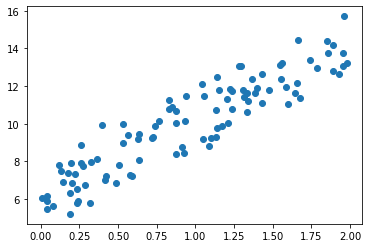

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 회귀식인 y=4X+6을 근사하기위해 100개의 데이터셋을 만들고, 경사하강법으로 회귀계수 w0(편향),w1(기울기,가중치)을 도출
np.random.seed(0)
# y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1) # 0~1 사이의 random 소수 
y = 6+4 * X+np.random.randn(100,1)

#X,y 데이터 셋 산점도로 시각화
plt.scatter(X,y)

In [2]:
# 비용함수로 정의. 실제값y, 예측값y_pred로 받아서 수식에 넣기
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [3]:
# w1, w0을 업데이트할 w1_update, w0_update를 반환
# 입력배열X에 대한 예측배열y_pred는 np.dot(X,w1.T)+w0으로 구한다.
# 100개의 X(1,2,..,100)이 있다면 예측값은 w0+X(1)*w1+X(2)*w1+..+X(100)*w1이며, X와 w1배열의 내적과 동일하다.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    
    # w0_update를 dot행렬연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1,w0을 업데이트할 w1_update,w0_update계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = --(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update,w0_update

In [5]:
# 경사하강법 함수 생성 : w1,w0모두 0으로 초기화해서 iters 갯수만큼 반복해서 업데이트
# 업데이트는 새로운 w1=이전w1+편미분한 수식을 반복하는것.(w0도 동일)
def gradient_descent_stpes(X, y, iters=10000):
    # 초기값 0으로 설정
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [6]:
# gradient_descent_steps 호출해서 w1,w0구하기
# 최종적으로 예측값과 실제값의 RSS차이구하는 get_cost함수 생성
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_stpes(X,y, iters=1000)
print(f"w1 : {w1[0,0]:.3f}, w0 : {w0[0,0]:.3f}")
y_pred = w1[0, 0]*X + w0
print("GD Total Cost", round(get_cost(y, y_pred),4))

w1 : 4.022, w0 : 6.162
GD Total Cost 0.9935


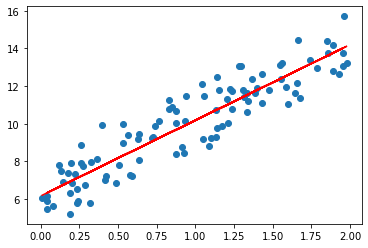

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred,'r')

### stochastic

- 확률적 경사하강법(SGD;Stochastic Gradient Descent)은 추출된 데이터 한개에 대해서 그래디언트를 계산하고, 경사 하강 알고리즘을 적용하는 방법이다.
- 매 step에서 한개의 샘플을 무작위로 선택하고 그 샘플에 대한 gradient를 계산하기때문에 한 step당 계산하는 속도가 매우 빠르다.
- 반면 확률적으로 샘플링하기때문에, 이 알고리즘은 불안정하다. cost function이 최솟값에 다다를 때까지 smooth하게 감소하지 않고 요동치며 감소한다. 시간이 지나면 최솟값에 매우 근접하겠지만 fluctuation이 지속되면서 minimum에 안착하지 못할 수 있다.

In [8]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X,sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update,w0_update계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1,w0

In [9]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))

y_pred = w1[0,0]*X +w0
print('SGD Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
SGD Total Cost:0.9937


- 확률적 경사하강법을 사용해본 결과 w1, w0은 경사하강법의 결과와 큰 차이가 없으며, 
- 예측오류비용 또한 0.9937로 경사하강법으로 구한 예측오류비용보다 아주 조금 높을뿐으로 큰 예측성능상의 차이가 없음을 알 수 있다.
- 따라서 큰 데이터를 처리할 경우에는 경사하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사하강법을 이용한다.

## 2. 사이킷런 LinearRegression을 이용한 보스턴 주택가격 예측

- 사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형기반 회귀를 클래스로 구현해 제공한다.
- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model 에서 다양한 선형모듈 확인가능

- LinearRegression클래스는 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares)추정 방식으로 구현한 클래스이다.
    - RSS(잔차제곱합) : 데이터와 추정 모델 사이의 불일치를 평가하는 척도
        - RSS가 작으면 모델이 데이터를 잘 설명하는 것이다.
        - 제곱합 = 설명되는 제곱합 + 잔차 제곱합
- LinearRegression클래스는 fit()메서드로 X,y배열을 입력받으면 회귀계수인 W를 coef_속성에 저장한다.

- LinearRegression은 계수 w = (w1,…, wp)를 사용하여 선형 모델을 피팅하여 데이터 세트에서 관찰 된 목표와 선형 근사에 의해 예측 된 목표 사이의 잔차 제곱합을 최소화한다.
    - fit_intercept : 모형에 intercept상수항(절편;그래프와 겹쳐있는 점)이 있는가 없는가를 결정하는 인수 (default : True). False로 설정하면 계산에 인터셉트가 사용되지 않고 0으로 지정된다 
        - ex) 데이터가 중앙에 배치 될 것으로 예상 됨
    - normalize : 매개변수 무시 여부. fit_intercept가 False로 설정된 경우 이 매개 변수는 무시된다 . True인 경우 회귀 변수 X는 평균을 빼고 l2- 노름으로 나누어 회귀 전에 정규화된다. 표준화하려면 normalize=False를 사용 하여 추정기에 fit 을 호출하기 전에 StandardScaler 를 사용 .
    - copy_X : X의 복사 여부. 그렇지 않으면 덮어 쓸 수 있다.
    - n_jobs : 계산에 사용할 작업 수. 이것은 n_targets> 1과 충분한 큰 문제에 대해서만 속도 향상을 제공
    - positivebool : True 로 설정 하면 계수가 양수가됩니다. 이 옵션은 고밀도 어레이에만 지원
    - coef_ : fit()메서드를 수행했을때 회귀 계수가 배열 형태로 저장하는 속성. shape는 (target값 갯수, feature 갯수)

In [10]:
from sklearn.linear_model import LinearRegression

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [17]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

In [18]:
bostonDF['PRICE'] = boston.target # boston데이터셋의 target 배열은 주택가격
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


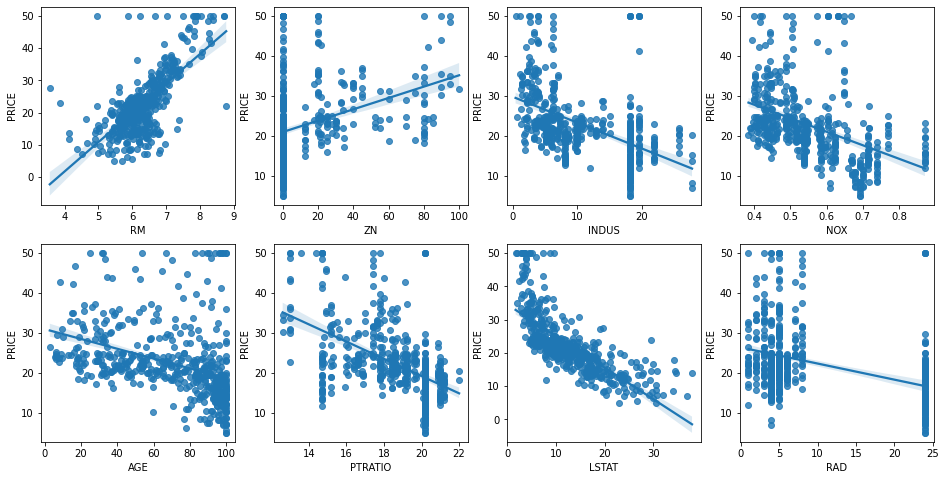

In [22]:
# 4개의 열, 2개의 행
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- 집 값 상승 : RM(방 갯수)는 양 방향의 선형성(Positive)이 가장 크다. 즉, 방 크기가 클수록 집값 상승
- 집 값 하락 : LSTAT(하위계층비율)은 음 방향의 선형성(Negative)이 가장 크다. 

### train/test 분리해서 학습과 예측을 수행

- 506개 데이터 -> 7:3 train/test 데이터 분리
- train : 학습 -> linear regression 학습/모델링 수행 -> 모델(W) 생성
- test : 평가(validation)-> 평가지표 (MSE, RMSE, ... )

In [24]:
df = bostonDF

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
        # m_s_e, r2(선형회귀모델 적합도 : 분산값, 1에 가까울수록 적합도 높음)

# feature, target 데이터 분리
y_target = df['PRICE'] # 레이블(종속변수)
X_data = df.drop(['PRICE'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습하기
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
print(X_train.shape, X_test.shape)

(354, 13) (152, 13)


In [27]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
y_preds[0:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

In [28]:
# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 17.297, RMSE: 4.159
Variance score : 0.757


- 주택 가격 모델의 intercept(절편)과 coefficients(회귀 계수;기울기)값 확인

In [29]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀계수: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [30]:
# 회귀계수 정렬 (내림차순, 큰 값부터)
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### cross_val_score를 이용해 교차검증

- RM의 양의 절대값이 제일 크다.
- NOX가 음의 절대값이 너무 크다.

- 사이킷런의 지표 평가 기준은 높은 지표값일수록 좋은 모델이지만,
- 일반적으로 회귀는 MSE값이 낮을수록 좋은 회귀 모델이다.

In [31]:
from sklearn.model_selection import cross_val_score

# features, target 데이터 정의
y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1)

# 선형회귀 객체 생성
lr = LinearRegression()

# 5 folds의 개별 Negative MSE scores (음수로 만들어 작은 오류 값이 더 큰 숫자로 인식됨)
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)

# RMSE를 구하기 위해선 MSE 값에 -1을 곱한 후 평균을 내면 된다
# 왜? scoring함수 호출하면 MSE값에 -1을 곱해서 반환하기때문에 
rmse_scores =  np.sqrt(-1*neg_mse_scores) # 그래서 다시!! -1을 곱해야 양수인 원래 모델에서 계산된 MSE값이 된다.

# 5 fold 의 평균 RMSE
avg_rmse = np.mean(rmse_scores)

In [32]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f' 5 folds 의 평균 RMSE : {avg_rmse:.3f}')

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


- 보스턴 주택가격 예측 RMSE값은 5.829가 나왔다.

### KNN 모델과 비교

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [39]:
knn_model = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)
lr_model = LinearRegression().fit(X_train, y_train)

In [40]:
print('KNN 학습평가:', knn_model.score(X_train,y_train))
print('LR 학습평가:', lr_model.score(X_train,y_train))

KNN 학습평가: 0.7494788081365981
LR 학습평가: 0.7273505005599823


In [41]:
print('KNN 테스트평가:', knn_model.score(X_test,y_test))
print('LR 테스트평가:', lr_model.score(X_test,y_test))

KNN 테스트평가: 0.499306667207422
LR 테스트평가: 0.7572263323138921


- Linear Regression모델이 더욱 잘 나왔다.